In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.io import wavfile
import random as rnd

In [84]:
data = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
def fft (data, intervalSize, rangeofFreq):
    if (len(data) < intervalSize):
        return None;
    start = rnd.randInt(0, len(data) - intervalSize)
    print(start)
    
fft(data, 7, 1000)

NameError: name 'rnd' is not defined

In [78]:
rate, data = wavfile.read('file.wav')
#take first channel
data = data.T[0]
print(len(data))
# data normalization


result = fftpack.fft(data[7500000:8000000],15000)


result


8673588


array([ 3225125.00000000     +0.j        ,
        3665882.08405897+170090.14379637j,
        3176782.59254673-158419.76924874j, ...,
        2568750.65129914+449284.95481037j,
        3176782.59254673+158419.76924874j,
        3665882.08405897-170090.14379637j])

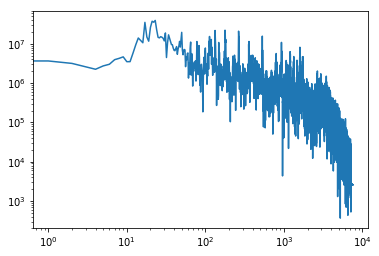

<function matplotlib.pyplot.show>

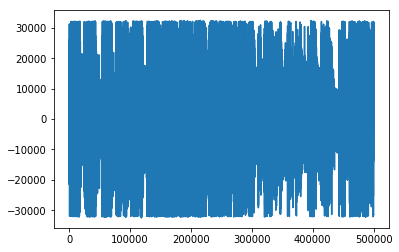

In [76]:
magnitudes = [np.absolute(y) for y in result[0:7500]]
magnitudes
plt.plot(magnitudes)
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(data[7500000:8000000])
plt.show

In [ ]:
#0 to 60 subbass
#60  to 300 bass
#300 to 2000 midrange
#2000 to 6000 high mids
#6000-15000 high freqs